In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows',2000)

In [3]:
df=pd.read_excel(r'D:\lab3data.xlsx',parse_dates=['data'])

In [4]:
df.head()

,data,USD,CAD,EUR
0,2023-10-26,93.1507,67.8397,98.6543
1,2023-10-25,93.5224,68.2994,99.5534
2,2023-10-24,94.7081,69.1552,100.3030
3,2023-10-21,95.9053,69.9273,101.4257
4,2023-10-20,97.3074,71.1052,102.6255


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import statsmodels.api as sm

ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (D:\anaconda\lib\site-packages\scipy\signal\signaltools.py)

In [ ]:
def standartization(a):
    amean=a.mean()
    astd=(((a-amean)**2).sum()/(a.size-1))**0.5
    return ((a-amean)/astd)

In [ ]:
for i in df.columns[1:4]:
    df[i+'_standart']=standartization(df[i])
    probplot=sm.ProbPlot(df[i+'_standart'])
    probplot.qqplot(line="45",label=i);
    plt.legend()
    probplot.ppplot(line="45",label=i);
    plt.legend()

(array([ 71., 101., 346., 207., 393.,  30.,  68.,   9.,   3.,   4.]),
 array([ 52.7379 ,  60.75992,  68.78194,  76.80396,  84.82598,  92.848  ,
        100.87002, 108.89204, 116.91406, 124.93608, 132.9581 ]),
 <BarContainer object of 10 artists>)

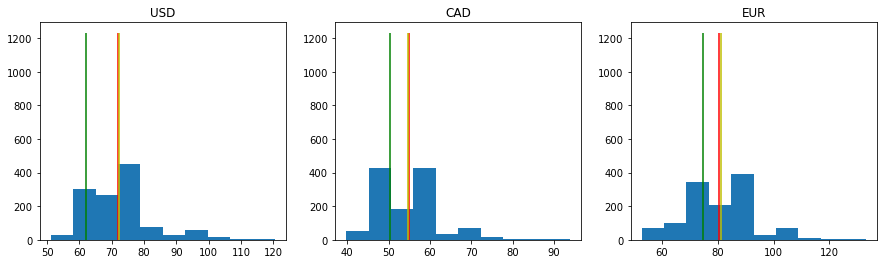

In [7]:
fig, axes = plt.subplots(1,3)
fig.set_figwidth(15)
axes[0].set_title('USD')
axes[0].vlines(df.USD.mean(),0,df.USD.size,colors='r')
axes[0].vlines(df.USD.mode()[0],0,df.USD.size,colors='g')
axes[0].vlines(df.USD.median(),0,df.USD.size,colors='y')
axes[0].hist(df.USD)
axes[1].set_title('CAD')
axes[1].vlines(df.CAD.mean(),0,df.CAD.size,colors='r')
axes[1].vlines(df.CAD.mode()[0],0,df.CAD.size,colors='g')
axes[1].vlines(df.CAD.median(),0,df.CAD.size,colors='y')
axes[1].hist(df.CAD)
axes[2].set_title('EUR')
axes[2].vlines(df.EUR.mean(),0,df.EUR.size,colors='r')
axes[2].vlines(df.EUR.mode()[0],0,df.EUR.size,colors='g')
axes[2].vlines(df.EUR.median(),0,df.EUR.size,colors='y')
axes[2].hist(df.EUR)

In [8]:
from scipy.stats import norm

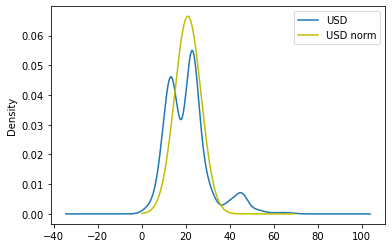

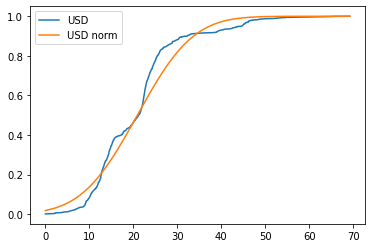

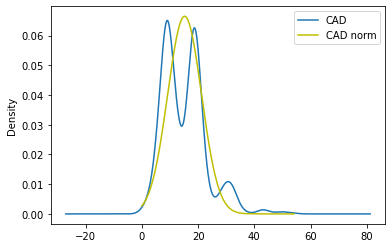

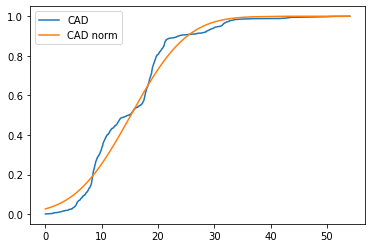

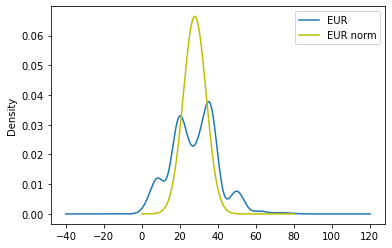

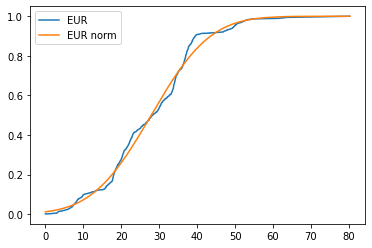

In [9]:
for i in df.columns[1:4]:
    plt.figure()
    (df[i]-df[i].min()).plot.kde(label=i)
    x=np.sort(df[i]-df[i].min())
    plt.plot(x,norm.pdf(x,x.mean(),6),c='y',label=i+' norm')
    plt.legend()
    plt.figure()
    x=np.sort(df[i]-df[i].min())
    y=np.arange(1,len(x)+1)/len(x)
    plt.plot(x,y,label=i)
    plt.plot(x,norm.cdf(x,x.mean(),(((df[i]-df[i].mean())**2).sum()/(df[i].size-1))**0.5),label=i+' norm')
    plt.legend()

Выбираю критерий Шапиро-Уилка так как количество наблюдений < 2000

In [10]:
from scipy.stats import shapiro

In [11]:
for i in df.columns[1:4]:
    wp=shapiro(df[i])
    print(i)
    if wp[1]>=0.05:
        print(wp,'\npvalue>0.05 следовательно Н0 принимается, распределение нормальное\n')
    else:
        print(wp,'\npvalue<0.05 следовательно Н0 отклоняется, распределение ненормальное\n')

USD
ShapiroResult(statistic=0.9024698138237, pvalue=2.6128939407036022e-27) 
pvalue<0.05 следовательно Н0 отклоняется, распределение ненормальное

CAD
ShapiroResult(statistic=0.9178050756454468, pvalue=2.4626376242301733e-25) 
pvalue<0.05 следовательно Н0 отклоняется, распределение ненормальное

EUR
ShapiroResult(statistic=0.9764458537101746, pvalue=2.7300172756108965e-13) 
pvalue<0.05 следовательно Н0 отклоняется, распределение ненормальное



pvalue<0.05 следовательно Н0 принимается, распределение нормальное

In [12]:
def bezvybrosov(a):
    amean=a.mean()
    astd=(((a-amean)**2).sum()/(a.size-1))**0.5
    return a[(a>=amean-2*astd)*(a<=amean+2*astd)]

In [13]:
for i in df.columns[1:4]:
    wp=shapiro(bezvybrosov(df[i]))
    print(i)
    if wp[1]>=0.05:
        print(wp,'\npvalue>0.05 следовательно Н0 принимается, распределение нормальное\n')
    else:
        print(wp,'\npvalue<0.05 следовательно Н0 отклоняется, распределение ненормальное\n')

USD
ShapiroResult(statistic=0.9715310335159302, pvalue=2.9741295282667904e-14) 
pvalue<0.05 следовательно Н0 отклоняется, распределение ненормальное

CAD
ShapiroResult(statistic=0.9543383121490479, pvalue=1.3137251469294215e-18) 
pvalue<0.05 следовательно Н0 отклоняется, распределение ненормальное

EUR
ShapiroResult(statistic=0.9758578538894653, pvalue=3.4412270667576184e-13) 
pvalue<0.05 следовательно Н0 отклоняется, распределение ненормальное



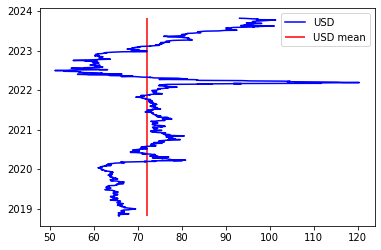

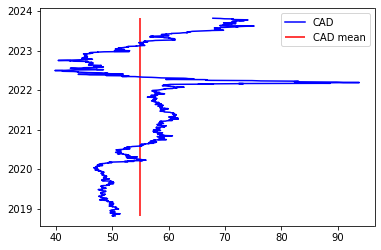

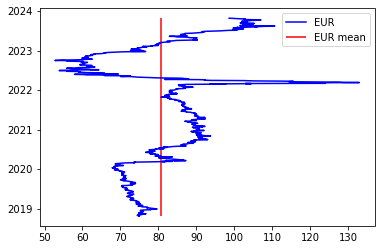

<Figure size 432x288 with 0 Axes>

In [14]:
for i in df.columns[1:4]:
    plt.plot(df.sort_values(by=['data'])[i],df.sort_values(by=['data']).data,'b',label=i)
    plt.vlines(df[i].mean(),df.data.min(),df.data.max(),'r',label=i+' mean')
    plt.legend()
    plt.figure()

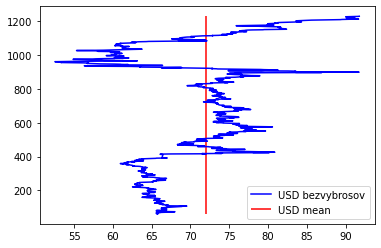

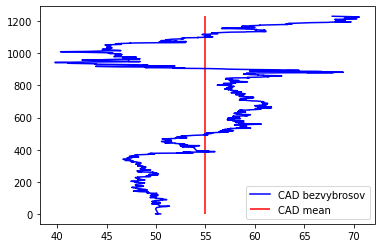

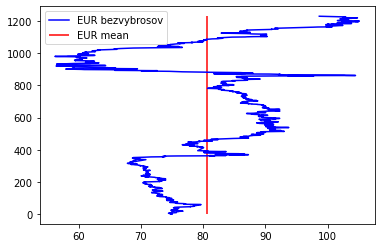

<Figure size 432x288 with 0 Axes>

In [15]:
for i in df.columns[1:4]:
    m=bezvybrosov(df[i]).to_frame().reset_index().iloc[:,0]
    plt.plot(bezvybrosov(df[i]).sort_index(ascending=False),m,'b',label=i+' bezvybrosov')
    plt.vlines(df[i].mean(),m.min(),m.max(),'r',label=i+' mean')
    plt.legend()
    plt.figure()

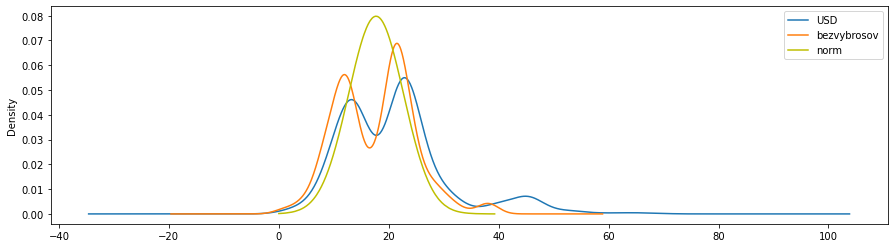

In [16]:
fig=plt.figure()
fig.set_figwidth(15)
i=df.USD
(i-i.min()).plot.kde(label='USD')
i=bezvybrosov(df.USD)
(i-i.min()).plot.kde(label='bezvybrosov')
x=np.sort(i-i.min())
plt.plot(x,norm.pdf(x,x.mean(),5),c='y',label='norm')
plt.legend()

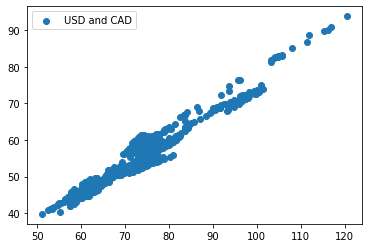

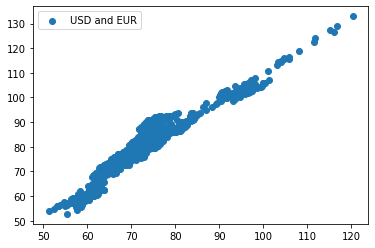

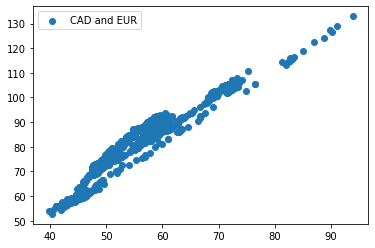

<Figure size 432x288 with 0 Axes>

In [17]:
for i in range(1,4):
    for j in range(i+1,4):
        plt.scatter(df.iloc[:,i],df.iloc[:,j],label=(df.iloc[:,i].name+' and '+ df.iloc[:,j].name))
        plt.legend()
        plt.figure()

In [18]:
df[['USD_standart','CAD_standart','EUR_standart']].cov()

KeyError: "None of [Index(['USD_standart', 'CAD_standart', 'EUR_standart'], dtype='object')] are in the [columns]"

In [ ]:
from scipy.stats import pearsonr,spearmanr,kendalltau 

In [ ]:
for i in range(4,7):
    for j in range(i+1,7):
        print(df.iloc[:,i].name,df.iloc[:,j].name)
        print(pearsonr(df.iloc[:,i],df.iloc[:,j]))
        print(spearmanr(df.iloc[:,i],df.iloc[:,j]))
        print(kendalltau(df.iloc[:,i],df.iloc[:,j]))
        print()

In [19]:
from sklearn.linear_model import LinearRegression

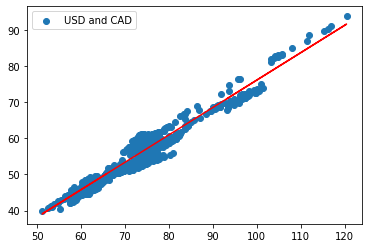

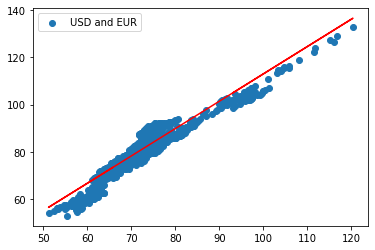

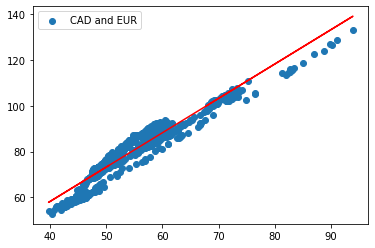

<Figure size 432x288 with 0 Axes>

In [20]:
for i in range(1,4):
    X=np.array(df.iloc[:,i]).reshape(-1,1)
    for j in range(i+1,4):
        Y=np.array(df.iloc[:,j])
        plt.scatter(X,Y,label=df.iloc[:,i].name+' and '+df.iloc[:,j].name)
        plt.plot(X,LinearRegression().fit(X,Y).predict(X),'r')
        plt.legend()
        plt.figure()

In [1]:
from xml.etree import ElementTree

In [2]:
tree=ElementTree.parse('D:/a_groups.xml')

In [3]:
root=tree.getroot()

In [4]:
print(root)

<Element 'another-students-db-a-groups' at 0x000001C4D79E7F90>


In [13]:
print(len(root[0]))

7


In [20]:
c=0
for child in root:
    c+=1
print(c)

13648


In [63]:
root[0]

<Element 'another-students-db-a-group' at 0x000001C4D79EB090>

In [15]:
for i in range(len(root[0])):
    print(root[0][i].tag)

id
name
old-name
term-number
study-year
created-at
updated-at


In [21]:
for i in range(len(root[0])):
    print(root[0][i].tag, root[0][i].attrib)

id {'type': 'integer'}
name {}
old-name {'nil': 'true'}
term-number {'type': 'integer'}
study-year {}
created-at {'type': 'dateTime'}
updated-at {'type': 'dateTime'}


In [22]:
for child in root:
    for i in range(len(root[0])):
        

IndentationError: expected an indented block (Temp/ipykernel_37124/2549771166.py, line 3)

In [26]:
(root[0][0].attrib)

{'type': 'integer'}

In [49]:
count_id=0
for el in root.iter('id'):
    if (el.text) is not None: count_id+=1
print(count_id)

13648


In [57]:
for i in range(len(root[0])):
    for el in root.iter(root[0][i]):
        print(root[0][i].tag)
        if (len(str(el.text)))>len_str: len_str=(len(str(el.text)))
    print(len_str)
    

TypeError: 'int' object is not iterable

In [62]:
for i in range(len(root[0])):
    len_str=0
    print(root[0][i].tag, end=' - ')
    for el in root.iter(root[0][i].tag):
        if (len(str(el.text)))>len_str: len_str=(len(str(el.text)))
    print(len_str)

id - 5
name - 11
old-name - 8
term-number - 2
study-year - 9
created-at - 25
updated-at - 25
